# BAKE OFF

In [1]:
# import libraries
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt
# pre and post processing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
from sklearn import metrics
from sklearn.metrics import make_scorer, accuracy_score
from sklearn.utils import resample
from imblearn.under_sampling import TomekLinks
# mdoels
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.feature_selection import SelectKBest, f_regression,mutual_info_regression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import BaggingClassifier

## Data Cleaning

In [2]:
df = pd.read_csv('training_data.csv' , index_col=0)
pd.options.display.max_columns = 100
df.shape

(22500, 24)

In [3]:
df = df.rename(columns=
           {'X1': 'given_credit',
            'X2': 'gender',
            'X3': 'education',
            'X4': 'martial_status',
            'X5': 'age',
            'X6': 'past_status_sept',
            'X7': 'past_status_aug',
            'X8': 'past_status_jul',
            'X9': 'past_status_jun',
           'X10': 'past_status_may',
           'X11': 'past_status_apr',
           'X12': 'bill_sept',
           'X13': 'bill_aug',
           'X14': 'bill_jul',
           'X15': 'bill_jun',
           'X16': 'bill_may',
           'X17': 'bill_apr',
           'X18': 'paid_sept',
           'X19': 'paid_aug',
           'X20': 'paid_jul',
           'X21': 'paid_jun',
           'X22': 'paid_may',
           'X23': 'paid_apr',
             'Y': 'target'},
              inplace=False)

In [4]:
# df.info()

In [5]:
# change to float
df = df.apply(pd.to_numeric, errors='coerce')

In [6]:
# see if null is one row
df[df.isnull().any(axis=1)]

given_credit  gender  education  martial_status  age  past_status_sept  \
ID           NaN     NaN        NaN             NaN  NaN               NaN   

    past_status_aug  past_status_jul  past_status_jun  past_status_may  \
ID              NaN              NaN              NaN              NaN   

    past_status_apr  bill_sept  bill_aug  bill_jul  bill_jun  bill_may  \
ID              NaN        NaN       NaN       NaN       NaN       NaN   

    bill_apr  paid_sept  paid_aug  paid_jul  paid_jun  paid_may  paid_apr  \
ID       NaN        NaN       NaN       NaN       NaN       NaN       NaN   

    target  
ID     NaN

In [7]:
# drop row
df.dropna(axis=0, inplace=True)

## EDA

In [8]:
# df.hist(bins=10, figsize=(20,15))
# plt.show()

In [9]:
df['education'] = df['education'].replace(0, 4)
df['education'] = df['education'].replace(5, 4)
df['education'] = df['education'].replace(6, 4)

In [10]:
df['martial_status'] = df['martial_status'].replace(0, 3)

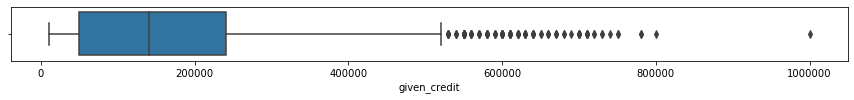

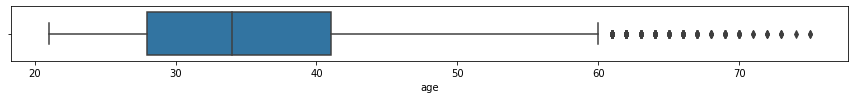

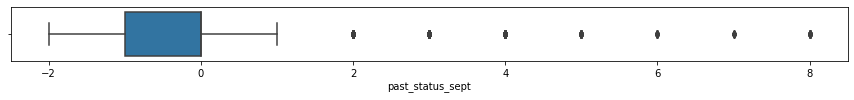

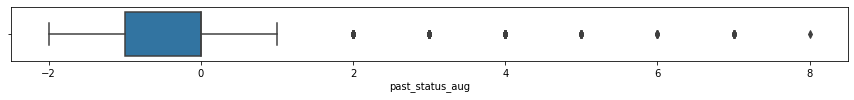

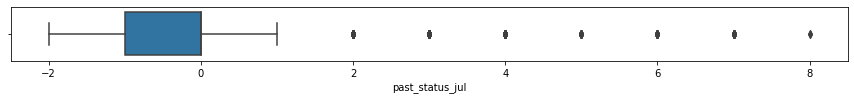

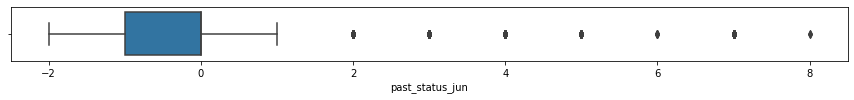

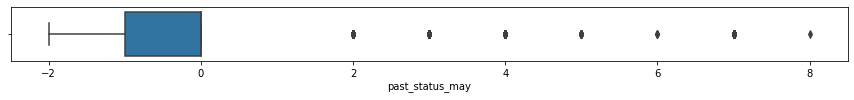

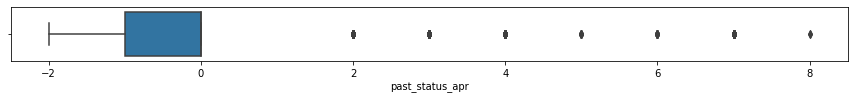

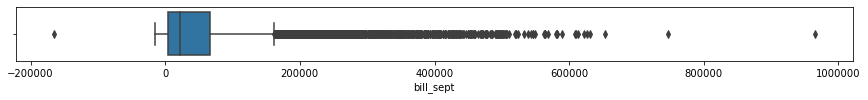

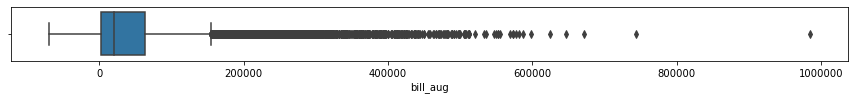

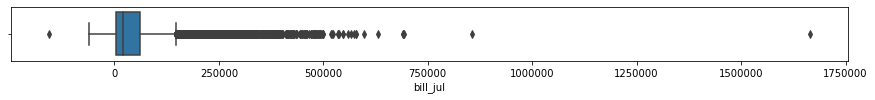

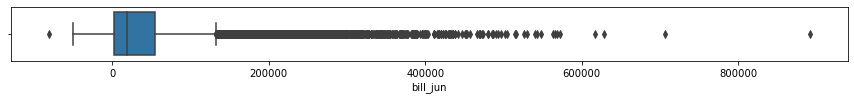

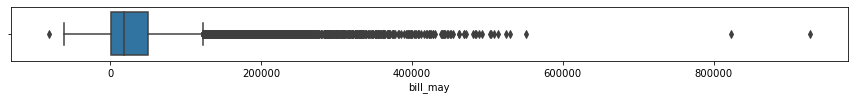

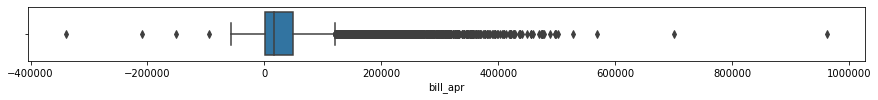

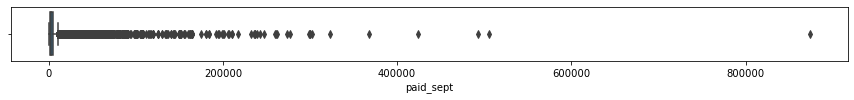

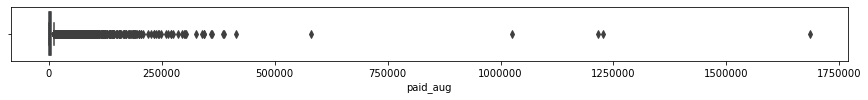

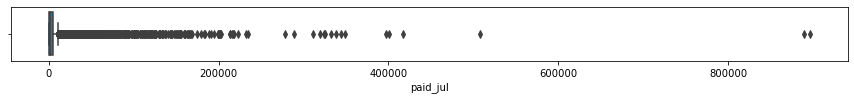

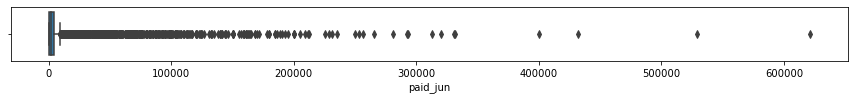

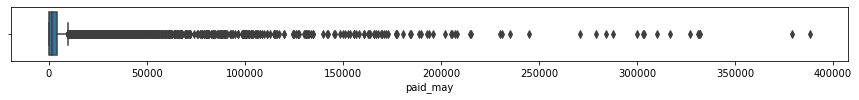

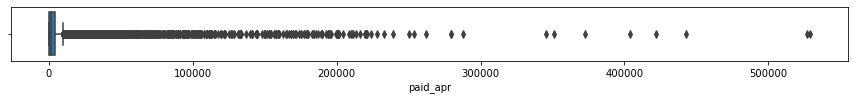

In [11]:
columns = list(df.columns)
columns.remove('gender')
columns.remove('education')
columns.remove('martial_status')
columns.remove('target')

for item in columns:
    plt.figure(figsize=(15,1))
    sns.boxplot(data=df, x=item);

In [12]:
# lowered credit outlier
df['given_credit'] = df['given_credit'].replace(1000000.0, 800000)

In [13]:
# ADJUSTING BILL OUTLIERS
df.loc[df['bill_sept'] >= 450000, 'bill_sept'] = 450000
df.loc[df['bill_sept'] <= -9000, 'bill_sept'] = -8000
df.loc[df['bill_aug'] >= 450000, 'bill_aug'] = 450000
df.loc[df['bill_jul'] >= 450000, 'bill_jul'] = 450000
df.loc[df['bill_jul'] <= -100000, 'bill_jul'] = -80000
df.loc[df['bill_jun'] >= 450000, 'bill_jun'] = 450000
df.loc[df['bill_may'] >= 450000, 'bill_may'] = 450000
df.loc[df['bill_apr'] >= 450000, 'bill_apr'] = 450000
df.loc[df['bill_apr'] <= -100000, 'bill_apr'] = -150000

In [14]:
df.loc[df['paid_sept'] >= 100000, 'paid_sept'] = 100000
df.loc[df['paid_aug'] >= 250000, 'paid_aug'] = 250000
df.loc[df['paid_jul'] >= 210000, 'paid_jul'] = 210000
df.loc[df['paid_jun'] >= 210000, 'paid_jun'] = 210000
df.loc[df['paid_may'] >= 210000, 'paid_may'] = 210000
df.loc[df['paid_apr'] >= 210000, 'paid_apr'] = 210000

## Feature Engineering

In [15]:
df['martial_status_married'] = np.where((df['martial_status']==1), 1, 0)
df['martial_status_single'] = np.where((df['martial_status']==2), 1, 0)

In [16]:
df['edu_gradschool'] = np.where((df['education']==1), 1, 0)
df['edu_uni'] = np.where((df['education']==2), 1, 0)
df['edu_highschool'] = np.where((df['education']==3), 1, 0)

In [17]:
df['past_status_sum'] = (df.past_status_sept + df.past_status_aug + df.past_status_jul + df.past_status_jun + df.past_status_may + df.past_status_apr) 
df['past_status_mean'] = ((df.past_status_sept + df.past_status_aug + df.past_status_jul + df.past_status_jun + df.past_status_may + df.past_status_apr) / 6)

In [18]:
df['bill_sum'] = (df.bill_sept + df.bill_aug + df.bill_jul + df.bill_jun + df.bill_may + df.bill_apr) 
df['bill_mean'] = ((df.bill_sept + df.bill_aug + df.bill_jul + df.bill_jun + df.bill_may + df.bill_apr) / 6)

In [19]:
df['paid_sum'] = (df.paid_sept + df.paid_aug + df.paid_jul + df.paid_jun + df.paid_may + df.paid_apr) 
df['paid_mean'] = ((df.paid_sept + df.paid_aug + df.paid_jul + df.paid_jun + df.paid_may + df.paid_apr) / 6)

In [20]:
df['bill_paid_sum_diff'] = df.bill_sum - df.paid_sum
df['bill_paid_mean_diff'] = df.bill_mean - df.paid_mean

In [21]:
df['never_late'] = np.where((df['past_status_sept']<=0) & 
                    (df['past_status_aug']<=0) & 
                    (df['past_status_jul']<=0) &
                    (df['past_status_jun']<=0) & 
                    (df['past_status_may']<=0) & 
                    (df['past_status_apr']<=0), 1, 0)

## Split Data

In [22]:
# features
X = df.drop('target', axis = 1) 
# target variable
y = df['target']

In [23]:
df_features = df.drop('target', axis = 1) 

In [24]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=.2, random_state=20)

In [25]:
tl = TomekLinks()
X_train, y_train = tl.fit_resample(X_train, y_train)

In [26]:
X_train.shape

(16765, 37)

In [27]:
y_train.shape

(16765,)

## Logistic Regression

In [28]:
logreg = LogisticRegression(max_iter=5000)
logreg.fit(X_train, y_train)

LogisticRegression(max_iter=5000)

In [29]:
y_pred_class = logreg.predict(X_test)

In [30]:
metrics.f1_score(y_test, y_pred_class)

0.0019723865877712033

In [31]:
THRESHOLD = .3
logreg_preds = np.where(logreg.predict_proba(X_test)[:,1] > THRESHOLD, 1, 0)

metrics.f1_score(y_test, logreg_preds)

0.42049689440993787

## KNN

In [32]:
scaler = StandardScaler()  
scaler.fit(X_train)

X_train = scaler.transform(X_train)  
X_test = scaler.transform(X_test)  

In [33]:
knn = KNeighborsClassifier(n_neighbors=25)

In [34]:
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=25)

In [35]:
y_pred_class = knn.predict(X_test)

In [36]:
metrics.f1_score(y_test, y_pred_class)

0.4550669216061185

In [37]:
THRESHOLD = .3
knn_preds = np.where(knn.predict_proba(X_test)[:,1] > THRESHOLD, 1, 0)

metrics.f1_score(y_test, knn_preds)

0.5159010600706715

## DECISION TREE

In [38]:
decision_tree = DecisionTreeClassifier(random_state=1)

In [39]:
param_dict={'max_depth': range(1,10),
            'criterion': ['gini', 'entropy'],
            'splitter': ['random', 'best'],
            'max_features': ['auto', 'sqrt', 'log2']}

In [40]:
grid_tree=GridSearchCV(decision_tree, 
                       param_dict, 
                       cv=10, 
                       scoring='f1', 
                       verbose=1, 
                       n_jobs=-1)

In [41]:
grid_tree.fit(X_train,y_train)

Fitting 10 folds for each of 108 candidates, totalling 1080 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    3.0s
[Parallel(n_jobs=-1)]: Done 976 tasks      | elapsed:    7.4s
[Parallel(n_jobs=-1)]: Done 1065 out of 1080 | elapsed:    8.0s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done 1080 out of 1080 | elapsed:    8.2s finished


GridSearchCV(cv=10, estimator=DecisionTreeClassifier(random_state=1), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(1, 10),
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'splitter': ['random', 'best']},
             scoring='f1', verbose=1)

In [42]:
y_pred = grid_tree.best_estimator_.predict(X_test)

In [43]:
dtc_preds = np.where(grid_tree.predict_proba(X_test)[:,1] > .45, 1, 0)
metrics.f1_score(y_test, dtc_preds)

0.5177725118483413

### Bagged Decision Tree

In [44]:
bc_dtc = BaggingClassifier(
            base_estimator=DecisionTreeClassifier(random_state = 1, max_depth=5, class_weight='balanced'), 
            n_estimators= 2000,
            max_samples= 0.8,
            max_features= 20,
            oob_score= True
                )

In [45]:
bc_dtc.fit(X_train, y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(class_weight='balanced',
                                                        max_depth=5,
                                                        random_state=1),
                  max_features=20, max_samples=0.8, n_estimators=2000,
                  oob_score=True)

In [46]:
bc_dtc_preds = bc_dtc.predict(X_test)

In [47]:
metrics.f1_score(y_test, bc_dtc_preds)

0.5316045380875203

## Random Forest

In [48]:
rfc = RandomForestClassifier(random_state = 1, 
                             n_estimators=100, 
                             max_depth=10, 
                             max_features=29)

In [49]:
rfc.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, max_features=29, random_state=1)

In [50]:
rfc_preds = rfc.predict(X_test)

In [51]:
rfc_preds = np.where(rfc.predict_proba(X_test)[:,1] > .45, 1, 0)
metrics.f1_score(y_test, rfc_preds)

0.5244549204478491

## Voting Classifier

In [52]:
voting_clf = VotingClassifier(
                estimators=[('knn', knn), ('dtc', grid_tree), ('bagged_dtc', bc_dtc)], 
                voting='soft')

voting_clf.fit(X_train, y_train)

vc_preds = voting_clf.predict(X_test)

vc_f1 = metrics.f1_score(y_test, vc_preds)

print(vc_f1)

Fitting 10 folds for each of 108 candidates, totalling 1080 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 1080 out of 1080 | elapsed:    4.8s finished


0.5230769230769231
